In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 국가별 음주량 정보 데이터 불러오기
drinks = pd.read_csv("./data/drinks.csv")

In [3]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# 상관 분석

### 아래 4개의 피처 간 상관 계수(Correlation Coefficient) 구하기

In [11]:
arr = ["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]
corr = drinks[arr].corr(method="pearson")
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


# seaborn을 활용한 시각화 => "heatmap"

In [12]:
import seaborn as sns

In [13]:
labels = ["beer", "spirit", "wine", "alcohol"]  # 시각화 자료 label용 배열

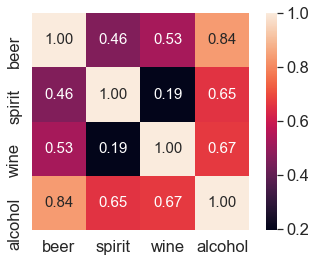

In [14]:
sns.set(font_scale=1.5)  # 폰트스케일 셋팅
hm = sns.heatmap(corr.values, annot=True, square=True, fmt=".2f", annot_kws={"size":15},
                xticklabels=labels, yticklabels=labels)  # 옵션을 통해 숫자 표기, 정사각형 출력 및 숫자 크기, 포맷 설정

### => wine과 spirit 소비량의 상관 관계는 높지 않은 데 반해, beer와 알콜섭취량의 상관 관계는 상대적으로 매우 높은 것으로 나타남

# seaborn을 활용한 시각화 => "pairplot"

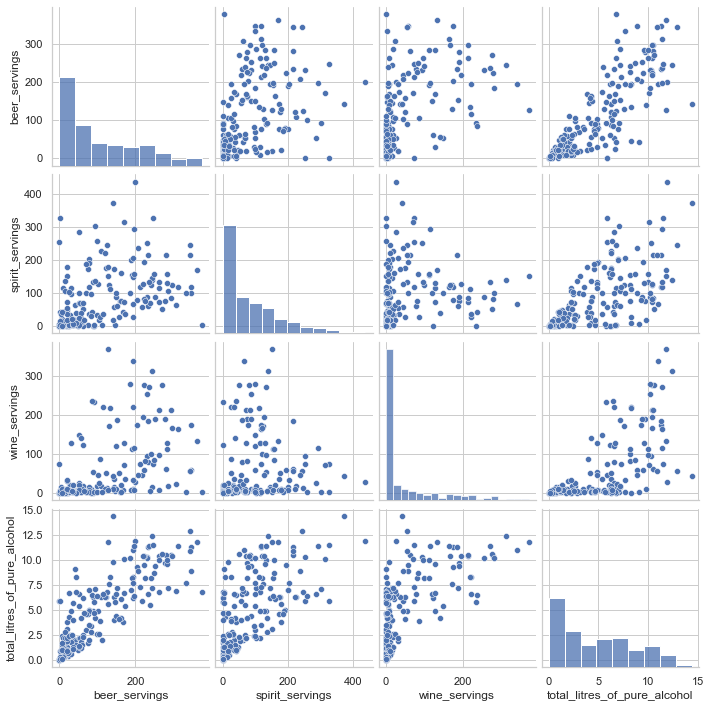

In [16]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]])

### => 각각의 피처에 대한 상관 관계에 대해 숫자가 아닌 그래프를 통해 시각적으로 좀 더 구체적으로 확인

# 대륙별 알콜섭취량 비교(전체 평균 대비)

# 결측 데이터 전처리 : fillna()

In [26]:
drinks.info()
drinks.head(10)  # "continent"열 데이터에 결측 데이터가 있는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [27]:
drinks["continent"] = drinks["continent"].fillna("OT")
drinks.head(10)  # 결측 데이터가 "OT"값으로 채워진 것을 확인

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [28]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [29]:
# 전체 평균 및 대륙별 알콜섭취량 산출
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()

In [30]:
# 전체 평균 대비 알콜섭취량 높은 대륙만 추출
result = continent_mean[continent_mean > total_mean]
result

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [31]:
# 시각화 작업
x = continent_mean.index.tolist()
x.append("Mean")  # 평균치 칸 하나 추가해 줌

continent_mean["Mean"] = total_mean  # 평균치 값을 추가로 넣어줌

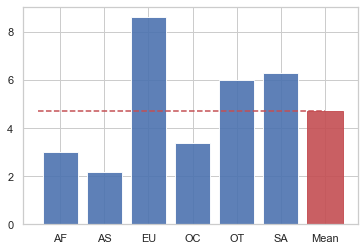

In [33]:
bar = plt.bar(x, continent_mean, align="center", alpha=0.9)
bar[len(x) - 1].set_color('r')  # 마지막 칸에 있는 평균치 값에 대해 별도의 설정 적용
plt.plot([-0.5, 6], [total_mean, total_mean], "r--")  # 평균치 값을 점선으로 표시해 줌

plt.show()

### => 전체 평균 대비 알콜섭취량이 높은 3개 그룹을 시각적으로 확인

# 국가별 술 소비량 대비 알콜비율 비교

In [34]:
# 전체 술 소비량 피처 추가
drinks["total_servings"] = drinks["beer_servings"] + drinks["spirit_servings"] + drinks["wine_servings"]
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,OT,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [35]:
# 술 소비량 대비 알콜비율 피처 추가
drinks["alcohol_rate"] = drinks["total_litres_of_pure_alcohol"] / drinks["total_servings"]
drinks["alcohol_rate"] = drinks["alcohol_rate"].fillna(0)  # 값 없는 부분 0으로 채우기
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
5,Antigua & Barbuda,102,128,45,4.9,OT,275,0.017818
6,Argentina,193,25,221,8.3,SA,439,0.018907
7,Armenia,21,179,11,3.8,EU,211,0.018009
8,Australia,261,72,212,10.4,OC,545,0.019083
9,Austria,279,75,191,9.7,EU,545,0.017798


In [37]:
### 필요한 피처만 골라 정보를 담은 후, 내림차순 정렬 => 국가별 알콜비율 순위 확인 가능
r = drinks[["country", "alcohol_rate"]]
r_sort = r.sort_values(by=["alcohol_rate"], ascending=False)  # "alcohol_rate" 기준 내림차순 정렬
r_sort.head(10)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


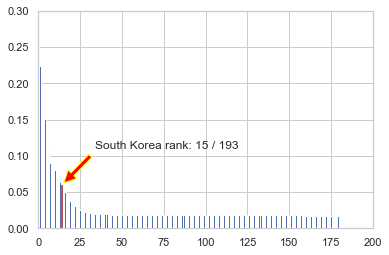

In [38]:
### 시각화 및 주석 통한 우리나라 순위 표시
x = np.arange(len(r_sort.index)).tolist()
y = r_sort["alcohol_rate"].tolist()
country_list = r_sort["country"].tolist()

bar = plt.bar(x, y)
bar[country_list.index("South Korea")].set_color('r')
plt.axis([0, 200, 0.0, 0.3])  # x축, y축 범위 지정

Korea_index = country_list.index("South Korea")  # x축 위치 확인
Korea_alcohol_rate = r_sort["alcohol_rate"].tolist()[Korea_index]  # y축 위치 확인

plt.annotate("South Korea rank: " + str(Korea_index + 1) + " / " + str(len(country_list)),  # 주석 텍스트
            xy=(Korea_index, Korea_alcohol_rate),  # 주석의 해당 위치
            xytext=(Korea_index + 20, Korea_alcohol_rate + 0.05),  # 주석에 대한 텍스트 위치
            arrowprops=dict(facecolor="red", edgecolor="yellow", shrink=0.07))  # 화살표 속성 설정

plt.show()

### => 전체적인 분포와 함께 우리나라의 순위는 15위인 것으로 확인됨